In [8]:
#Program 11 - Identifying features for transformation

In [9]:
#importing pandas library
import pandas as pd

#importing data into a dataframe
Data = pd.read_csv("E:/Training/Certifications - LinkedIn/NLP with Python for Machine Learning Essential Training/Dataset/SMSSpamCollection.tsv",sep="\t",header=None,names=["Label","Text"])

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
8,ham,I'm gonna be home soon and i don't want to tal...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
#creating additional feature 1 - length of text message (assumption: length of messages labelled as spam is more than length of messages labelled as ham)
#This is done by applying len() on each text messages and excluding number of white spaces from length using count()

In [11]:
#calculating total number of characters (excluding white spaces) in a text message
Data["Text_Length"] = Data["Text"].apply(lambda x: len(x) - x.count(" "))

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text,Text_Length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135
6,spam,WINNER!! As a valued network customer you have...,132
7,spam,Had your mobile 11 months or more? U R entitle...,126
8,ham,I'm gonna be home soon and i don't want to tal...,89
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111


In [12]:
#creating additional feature 2 - percent of punctuation in text message (assumption: percent of punctuation in messages labelled as spam is more than percent of punctuation in messages labelled as ham)
#This is done by adding 1 for each character in text message which is also a punctuation, then counting total number of 1's using sum()
#Next calculating percent of punctuation by dividing the total number of punctuations by total number of characters in a text message (excluding white spaces), then rounding decimal point upto 3 spaces and multiplying by 100 to get % value

In [13]:
#importing string package
import string

#creating a function to calculate the percent of punctuation in a text message
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

#applying the method
Data["Text_Punct%"] = Data["Text"].apply(lambda x: punct_count(x))

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text,Text_Length,Text_Punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4
6,spam,WINNER!! As a valued network customer you have...,132,4.5
7,spam,Had your mobile 11 months or more? U R entitle...,126,1.6
8,ham,I'm gonna be home soon and i don't want to tal...,89,6.7
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111,7.2


In [ ]:
#evaluating if newly created features require transformation

In [14]:
#importing numpy and pyplot libraries
import numpy as np
from matplotlib import pyplot
%matplotlib inline

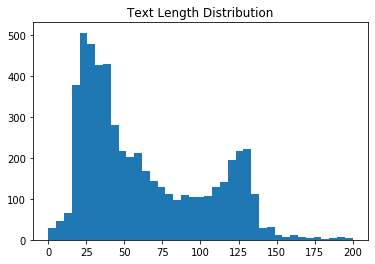

In [16]:
#plotting histogram to visualize if newly created feature 1 - text length requires transformation for better analysis
bins = np.linspace(0,200,40)
pyplot.hist(Data['Text_Length'],bins)
pyplot.title("Text Length Distribution")
pyplot.show()

In [17]:
#Conclusion: The bimodal histogram shows that lenth of text messages which are spam has more characters than the messages which are ham. Not heavily skewed or having clear outliers hence this newly created feature is not a great candidate for transformation.

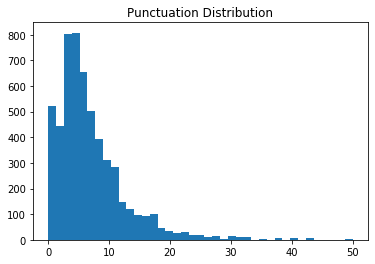

In [18]:
#plotting histogram to visualize if newly created feature 2 - punctuation percentage requires transformation for better analysis

#bins are defined with starting point of interval, ending point of interval and number of samples
#bins are defined as containers (i.e any text message with length between 0 and 25 (since cut-points are 40 ) will be showed in bin 1 and so on)
bins = np.linspace(0,50,40)

pyplot.hist(Data['Text_Punct%'],bins)
pyplot.title("Punctuation Distribution")
pyplot.show()

In [ ]:
#Conclusion: The histogram showing distribution of punctuation in messages is fairly skewed hence can prove to be a good conadidate for transformation.

In [20]:
#applying Box-Cox transformation to newly created feature "Text_Punct%"

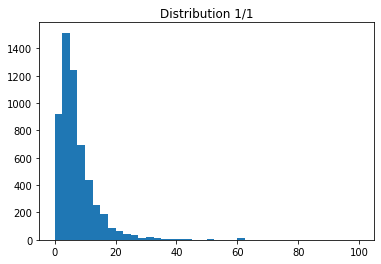

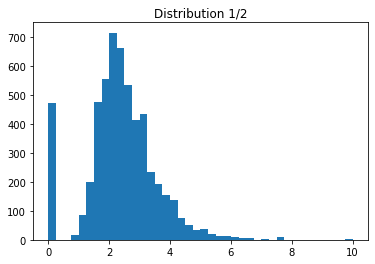

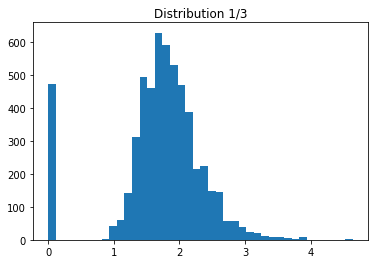

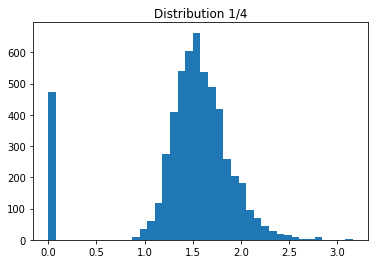

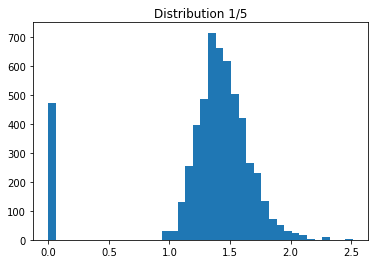

In [23]:
#running transformation with exponent degree 1 to 5
for i in [1,2,3,4,5]:
    pyplot.hist((Data["Text_Punct%"])**(1/i),bins=40)
    pyplot.title("Distribution 1/{}".format(str(i)))
    pyplot.show()